## CAPSTONE PROJECT - REGRESSION

# **IMPORT PACKAGES**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [76]:
# Load library/package
import os
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.stats import shapiro
from datetime import datetime

# Sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Statmodels
import statsmodels
import statsmodels.api as sm

# **LOAD DATASET**

In [88]:
#Load dataset Superstore.csv
df = pd.read_csv('/content/drive/MyDrive/PROGATE/Narasio/Superstore.csv')

#Menampilkan 5 data teratas
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08T00:00:00Z,2016-11-11T00:00:00Z,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08T00:00:00Z,2016-11-11T00:00:00Z,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12T00:00:00Z,2016-06-16T00:00:00Z,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11T00:00:00Z,2015-10-18T00:00:00Z,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11T00:00:00Z,2015-10-18T00:00:00Z,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
# Melihat shape dataset
df.shape

(9994, 21)

Dataset Superstore terdiri atas 9994 baris dan 21 kolom

# **PROBLEM STATEMENT**

Superstore merupakan salah satu perusahan retail  asal Amerika.Superstore ingin melakukan revenue optimization berdasarkan data pemasaran tahun 2014-2017. Superstore juga menginginkan insight terkait produk, wilayah, segmen pelanggan mana yang perlu mereka tingkatkan.

Berdasarkan dataset superstore.csv diketahui bahwa

Target/label(variabel Y) : Kolom 'Profit'

Feature2(variabel X) : selai kolom 'Profit'

# **EDA**


####a. Melihat informasi dan statistika deskriptif data 

In [6]:
#Melihat info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

Berdasarkan informasi terkait type data tiap feature di atas, ada beberapa treatment yang akan dilakukan seperti mengubah type data tanggal pesan dan tanggal kirim (menjadi type data datetime) dan menghapus kolom Row ID

In [89]:
# Drop kolom Row ID
df.drop(columns='Row ID', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Order Date     9994 non-null   object 
 2   Ship Date      9994 non-null   object 
 3   Ship Mode      9994 non-null   object 
 4   Customer ID    9994 non-null   object 
 5   Customer Name  9994 non-null   object 
 6   Segment        9994 non-null   object 
 7   Country        9994 non-null   object 
 8   City           9994 non-null   object 
 9   State          9994 non-null   object 
 10  Postal Code    9994 non-null   int64  
 11  Region         9994 non-null   object 
 12  Product ID     9994 non-null   object 
 13  Category       9994 non-null   object 
 14  Sub-Category   9994 non-null   object 
 15  Product Name   9994 non-null   object 
 16  Sales          9994 non-null   float64
 17  Quantity       9994 non-null   int64  
 18  Discount

In [90]:
# Mengubah format tanggal pesan dan tanggal kirim menjadi format datetime
df['Order Date']= pd.to_datetime(df['Order Date'])
df['Ship Date']= pd.to_datetime(df['Ship Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   Order ID       9994 non-null   object             
 1   Order Date     9994 non-null   datetime64[ns, UTC]
 2   Ship Date      9994 non-null   datetime64[ns, UTC]
 3   Ship Mode      9994 non-null   object             
 4   Customer ID    9994 non-null   object             
 5   Customer Name  9994 non-null   object             
 6   Segment        9994 non-null   object             
 7   Country        9994 non-null   object             
 8   City           9994 non-null   object             
 9   State          9994 non-null   object             
 10  Postal Code    9994 non-null   int64              
 11  Region         9994 non-null   object             
 12  Product ID     9994 non-null   object             
 13  Category       9994 non-null   object           

In [91]:
# Menambahkan kolom Lama Pengemasan
df['Packaging Time']=df['Ship Date']-df['Order Date']

In [92]:
# Mengambil data bulan dan tahun dari data order date
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Packaging Time,Year,Month
0,CA-2016-152156,2016-11-08 00:00:00+00:00,2016-11-11 00:00:00+00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3 days,2016,11
1,CA-2016-152156,2016-11-08 00:00:00+00:00,2016-11-11 00:00:00+00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3 days,2016,11
2,CA-2016-138688,2016-06-12 00:00:00+00:00,2016-06-16 00:00:00+00:00,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4 days,2016,6
3,US-2015-108966,2015-10-11 00:00:00+00:00,2015-10-18 00:00:00+00:00,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7 days,2015,10
4,US-2015-108966,2015-10-11 00:00:00+00:00,2015-10-18 00:00:00+00:00,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7 days,2015,10


In [93]:
# Melakukan analisa deskriptif
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit,Packaging Time,Year,Month
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896,3 days 22:59:46.311787072,2015.722233,7.809686
std,32063.693350,623.245101,2.225110,0.206452,234.260108,1 days 17:56:29.766161104,1.123555,3.284654
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0 days 00:00:00,2014.000000,1.000000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750,3 days 00:00:00,2015.000000,5.000000
50%,56430.500000,54.490000,3.000000,0.200000,8.666500,4 days 00:00:00,2016.000000,9.000000
75%,90008.000000,209.940000,5.000000,0.200000,29.364000,5 days 00:00:00,2017.000000,11.000000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000,7 days 00:00:00,2017.000000,12.000000


In [94]:
# Menghitung jumlah unique data pada categorycal data
cats =["Ship Mode", "Segment", "Country", "City", "State", "Region", "Category", "Sub-Category", "Product Name"]
for i in cats:
  print(f'''values count kolom {i}:''')
  print(df[i].value_counts())
  print()

values count kolom Ship Mode:
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

values count kolom Segment:
Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

values count kolom Country:
United States    9994
Name: Country, dtype: int64

values count kolom City:
New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: City, Length: 531, dtype: int64

values count kolom State:
California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona           

In [95]:
# Menghitung jumlah produk
print('Jumlah unique product di Superstore ada yaitu :', df['Product ID'].nunique())
print('Jumlah unique consumen di Superstore ada yaitu :', df['Customer ID'].nunique())

Jumlah unique product di Superstore ada yaitu : 1862
Jumlah unique consumen di Superstore ada yaitu : 793


### b. Univariate Analysis

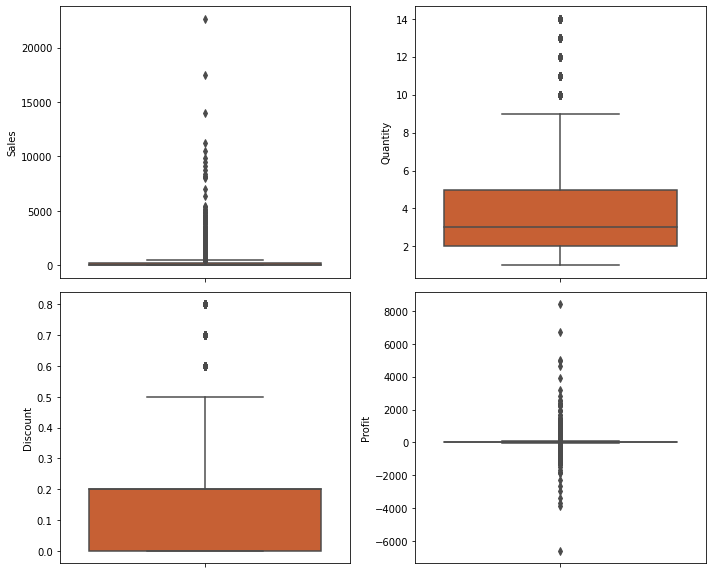

In [14]:
# Distribusi numerical data dengan boxplot
num_cols = ['Sales', 'Quantity', 'Discount', 'Profit']
plt.figure(figsize=(10, 12))
for j in range (0, len(num_cols)):
  plt.subplot(3, 2, j+1)
  sns.boxplot (y=df[num_cols[j]], color='#DE561C', order='v')
  plt.tight_layout()

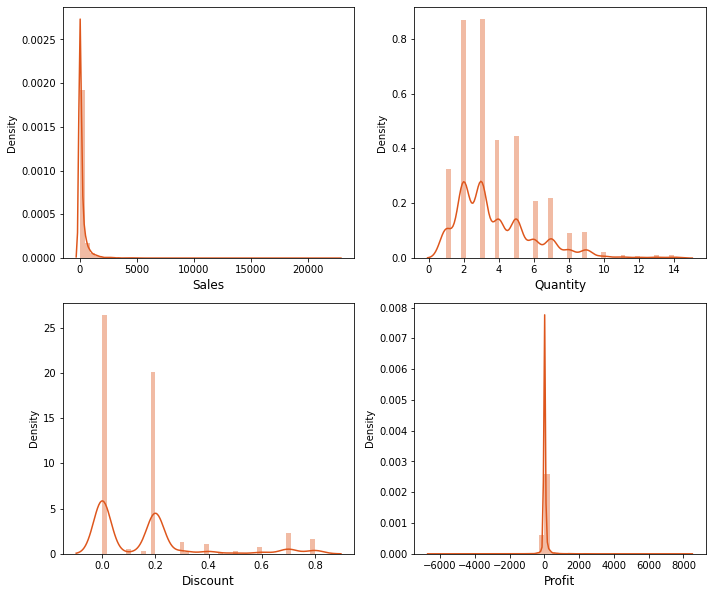

In [15]:
# Distribusi Numerical data dengan displot
warnings.filterwarnings('ignore')
plt.figure(figsize=(10, 12))
for j in range (0, len(num_cols)):
  plt.subplot(3, 2, j+1)
  sns.distplot(x=df[num_cols[j]], color='#DE561C')
  plt.xlabel(num_cols[j], fontsize=12)
  plt.tight_layout()

<Figure size 1584x1584 with 0 Axes>

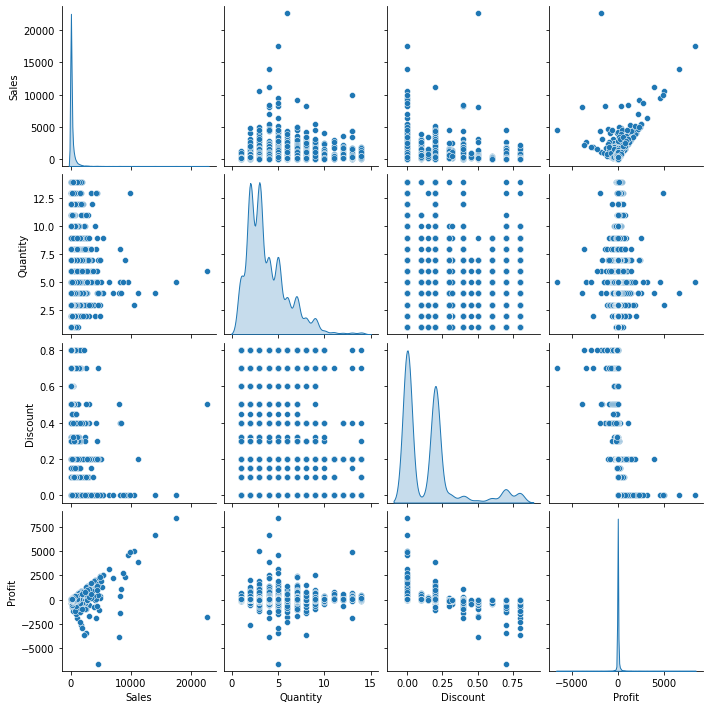

In [16]:
# Distribusi Numerical data dengan displot
plt.figure(figsize=(22, 22))
sns.pairplot(df[num_cols], diag_kind='kde')

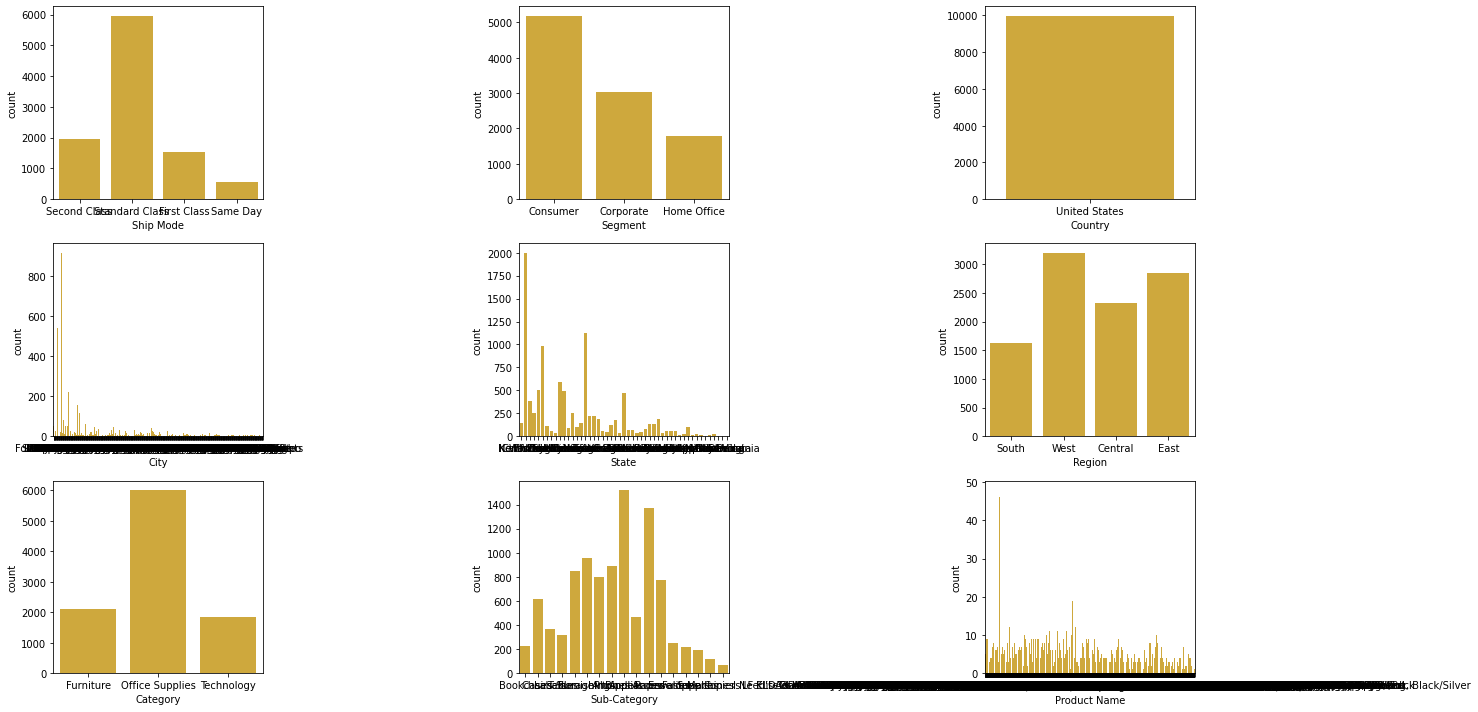

In [17]:
plt.figure(figsize=(20, 10))
for i in range(0, len(cats)):
  plt.subplot(3,3, i +1)
  sns.countplot(x=df[cats[i]], color='#E6B325', orient='v')
  plt.tight_layout()

### c. Business Insight

Questions:


*   Berapa total sales dan profit yang diperoleh Superstore 4 tahun terakhir?
*   Bagaimana penjualan dan keuntungan tiap bulannya selama 4 tahun terakhir?
*   Top 10 produk berdasarkan sales dan profit
*   Bottom 10 produk berdasarkan profit
*   Top 10 cities berdasarkan sales dan profit
*   Perbandingan profit per segment?
*   Moda pengiriman apa yang paling banyak digunakan?
*   Top 10 sub category berdasarkan sales dan profit?
*   Perbandingan Sales dan Profit per Categories?
*   Bagaimana share penjualan dan keuntungan berdasarkan region?








In [18]:
# Menghitung total sales dan profit pertahun 
sales_per_year = df.groupby(['Year', 'Month'])['Sales', 'Profit'].sum()
sales_per_year

Sales      Profit
Year Month                         
2014 1       14236.8950   2450.1907
     2        4519.8920    862.3084
     3       55691.0090    498.7299
     4       28295.3450   3488.8352
     5       23648.2870   2738.7096
     6       34595.1276   4976.5244
     7       33946.3930   -841.4826
     8       27909.4685   5318.1050
     9       81777.3508   8328.0994
     10      31453.3930   3448.2573
     11      78628.7167   9292.1269
     12      69545.6205   8983.5699
2015 1       18174.0756  -3281.0070
     2       11951.4110   2813.8508
     3       38726.2520   9732.0978
     4       34195.2085   4187.4962
     5       30131.6865   4667.8690
     6       24797.2920   3335.5572
     7       28765.3250   3288.6483
     8       36898.3322   5355.8084
     9       64595.9180   8209.1627
     10      31404.9235   2817.3660
     11      75972.5635  12474.7884
     12      74919.5212   8016.9659
2016 1       18542.4910   2824.8233
     2       22978.8150   5004.5795
     3       51715.8750   3611.9680
     4       38750.0390   2977.8149
     5       56987.7280   8662.1464
     6       40344.5340   4750.3781
     7       39261.9630   4432.8779
     8       31115.3743   2062.0693
     9       73410.0249   9328.6576
     10      59687.7450  16243.1425
     11      79411.9658   4011.4075
     12      96999.0430  17885.3093
2017 1       43971.3740   7140.4391
     2       20301.1334   1613.8720
     3       58872.3528  14751.8915
     4       36521.5361    933.2900
     5       44261.1102   6342.5828
     6       52981.7257   8223.3357
     7       45264.4160   6952.6212
     8       63120.8880   9040.9557
     9       87866.6520  10991.5556
     10      77776.9232   9275.2755
     11     118447.8250   9690.1037
     12      83829.3188   8483.3468

Text(0.5, 1.0, 'Sales and Profit Trends 2014-2017')

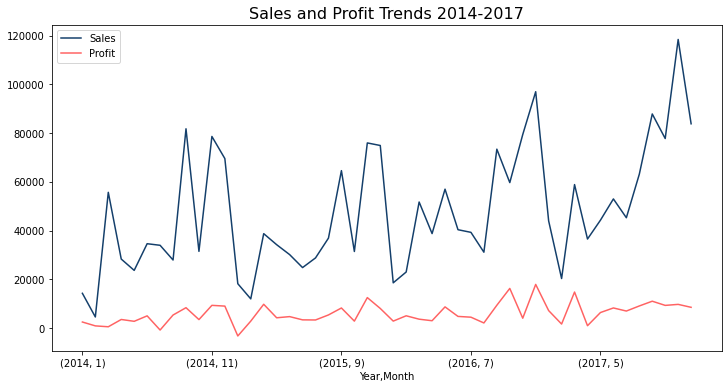

In [19]:
# Plot Sales dan Profit per tahun
sales_per_year.plot(kind='line', color=['#143F6B', '#FF6363'], figsize=(12,6))
plt.title('Sales and Profit Trends 2014-2017', fontsize=16)

In [96]:
# Perbandingan profit per Tahun
profit_per_years=df[['Year','Profit']].groupby(['Year'],as_index=False).sum().sort_values(by='Profit',ascending=False)

# Menghitung Persentasi Profit per Tahun
profit_per_years['% profit']=profit_per_years['Profit']/[profit_per_years['Profit'].sum()]*100
profit_per_years['% profit']=profit_per_years['% profit'].round(2)
profit_per_years

,Year,Profit,% profit
3,2017,93439.2696,32.63
2,2016,81795.1743,28.56
1,2015,61618.6037,21.52
0,2014,49543.9741,17.30


In [97]:
# Perbandingan profit per Tahun
sales_per_years=df[['Year','Sales']].groupby(['Year'],as_index=False).sum().sort_values(by='Sales',ascending=False)

# Menghitung Persentasi Profit per Tahun
sales_per_years['% sales']=sales_per_years['Sales']/[sales_per_years['Sales'].sum()]*100
sales_per_years['% sales']=sales_per_years['% sales'].round(2)
sales_per_years

,Year,Sales,% sales
3,2017,733215.2552,31.92
2,2016,609205.5980,26.52
0,2014,484247.4981,21.08
1,2015,470532.5090,20.48


Secara umum, penjualan Superstore baik sales maupun profit menunjukkan kenaikkan setiap tahunnya. Kenaikan profit tertinggi terjadi dari tahun 2015 ke tahun 2016 yakni sebesar 38,74%. Namun jika dilihat dari total sales yang dihasilkan kenaikan profit dari tahun 2014 - 2015 menjadi yang paling menguntungkan mengingat kenaikan sales tahun 2014 - 2015 hanya sebesar 2,90%.

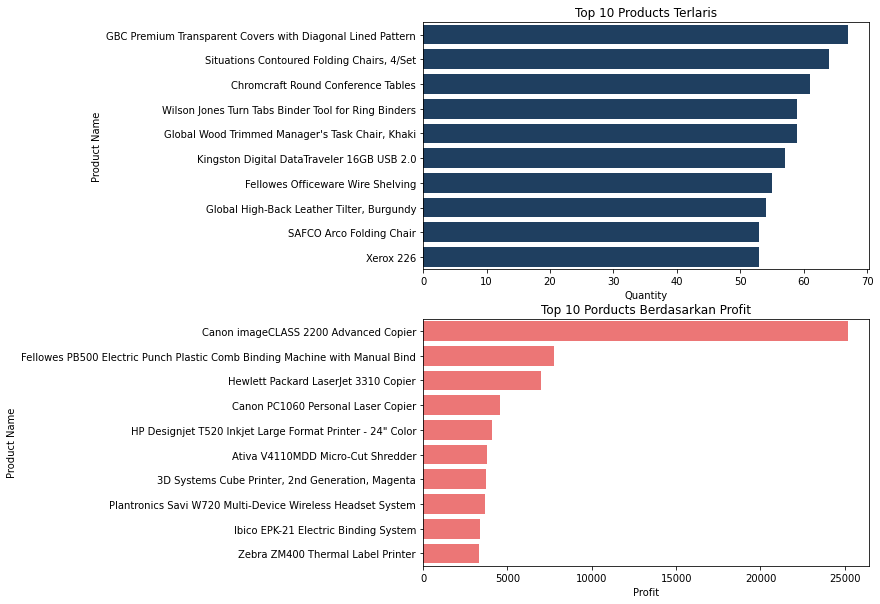

In [20]:
# Top 10 produk terlaris
top_10_products = df[['Product ID', 'Product Name', 'Quantity', 'Profit']].groupby(['Product ID', 'Product Name'], as_index=False).sum(['Quantity','Profit']).sort_values(by='Quantity',ascending=False)
# Top 10 produk berdasarkan profit
top_10_revenue_per_product=top_10_products.sort_values(by='Profit', ascending=False)

# Plot Top 10 Product per Quantity and Porfit
fig, axis=plt.subplots(2,1,figsize=(8,10))
ax1=sns.barplot(x='Quantity', y='Product Name', data=top_10_products.head(10), color='#143F6B',ax=axis[0]).set(title='Top 10 Products Terlaris')
ax2=sns.barplot(x='Profit',y='Product Name', data=top_10_revenue_per_product.head(10), color='#FF6363',ax=axis[1]).set(title='Top 10 Porducts Berdasarkan Profit')

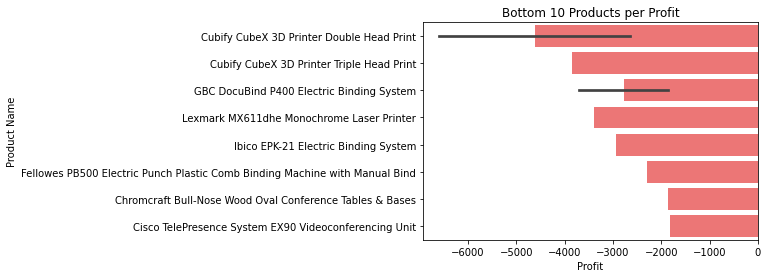

In [107]:
# Produk dengan Negative Profit
bottom_10_product=df[['Product ID','Product Name','Quantity','Profit']].loc[df['Profit']<0].sort_values(by='Profit', ascending=True)

# Plot Bottom 10 Product Berdasarkan Profit
fig, axis=plt.subplots(figsize=(6,4))
ax4=sns.barplot(x='Profit',y='Product Name',data=bottom_10_product.head(10),color='#FF6363').set(title='Bottom 10 Products per Profit')

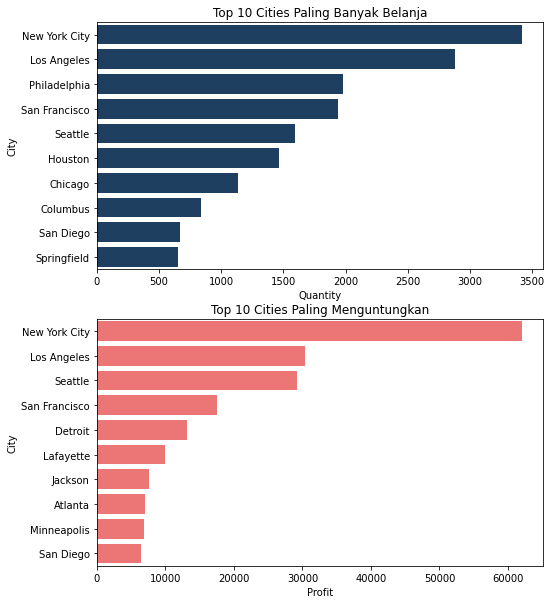

In [22]:
# Top 10 cities paling banyak belanja
top_10_cities = df[['City', 'Quantity', 'Profit']].groupby(['City'], as_index=False).sum(['Quantity','Profit']).sort_values(by='Quantity',ascending=False)
# Top 10 city paling menguntungkan
top_10_revenue_per_city = top_10_cities.sort_values(by='Profit', ascending=False)

# Plot Top 10 Cities per Quantity and Porfit
fig, axis=plt.subplots(2,1,figsize=(8,10))
ax1=sns.barplot(x='Quantity', y='City', data=top_10_cities.head(10), color='#143F6B',ax=axis[0]).set(title='Top 10 Cities Paling Banyak Belanja')
ax2=sns.barplot(x='Profit',y='City', data=top_10_revenue_per_city.head(10), color='#FF6363',ax=axis[1]).set(title='Top 10 Cities Paling Menguntungkan')


In [23]:
# Perbandingan profit antar segment pelanggan
profit_per_segment=df[['Segment','Customer ID','Profit']].groupby(['Segment'],as_index=False).sum().sort_values(by='Profit',ascending=False)

# Menghitung Persentasi Profit per Segment
profit_per_segment['% profit']=profit_per_segment['Profit']/[profit_per_segment['Profit'].sum()]*100
profit_per_segment['% profit']=profit_per_segment['% profit'].round(2)
profit_per_segment

,Segment,Profit,% profit
0,Consumer,134119.2092,46.83
1,Corporate,91979.1340,32.12
2,Home Office,60298.6785,21.05


Text(0.5, 1.0, 'Perbandingan % Profit per Segment')

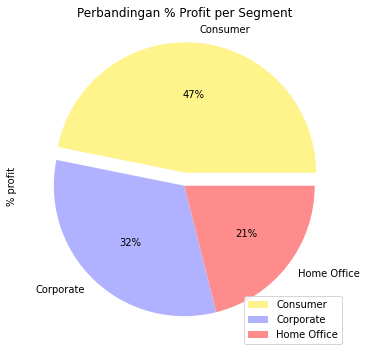

In [24]:
# Plot Komposisi Profit per Segment
explode = [0.1, 0, 0]
profit_per_segment.plot.pie(y='% profit', figsize=(6,6), labels=['Consumer','Corporate','Home Office'], explode=explode, autopct='%.0f%%', colors=['#FFF38C', '#B1B2FF', '#FF8C8C'])
plt.legend(loc='lower right')
plt.title('Perbandingan % Profit per Segment')

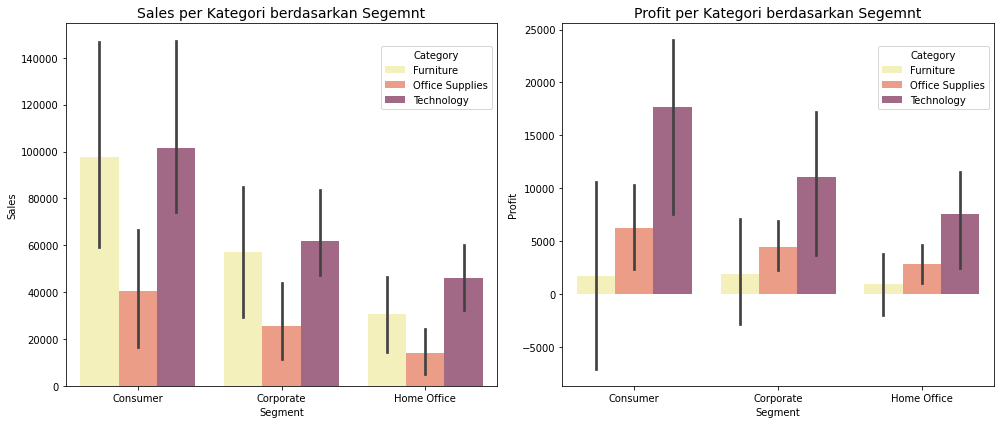

In [128]:
# Sum Quantity per Segment breakdown per Category and Sub Category
segment_cat=df.groupby(['Segment','Category', 'Sub-Category'], as_index=False).sum()
fig, (ax1, ax2) = plt.subplots(figsize=(14, 6), ncols=2)
sns.barplot(x=segment_cat["Segment"], y=segment_cat["Sales"], hue=segment_cat["Category"], palette=['#FCF8B3', '#FB9378', '#AB6088'],ax=ax1)
ax1.set_title("Sales per Kategori berdasarkan Segemnt", fontdict={"fontsize":14}, loc="center")
ax1.legend(title="Category", loc="center right", bbox_to_anchor=(1, 0.85))
fig.tight_layout()

sns.barplot(x=segment_cat["Segment"], y=segment_cat["Profit"], hue=segment_cat["Category"], palette=['#FCF8B3', '#FB9378', '#AB6088'],ax=ax2)
ax2.set_title("Profit per Kategori berdasarkan Segemnt", fontdict={"fontsize":14}, loc="center")
ax2.legend(title="Category", loc="center right", bbox_to_anchor=(1, 0.85))
fig.tight_layout()

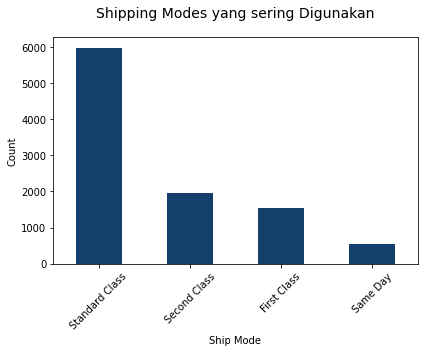

In [25]:
# Plot Perbandingan Ship Mode yang digunakan
plt.figure(figsize=(6,5))
df['Ship Mode'].value_counts().plot(kind='bar', color='#143F6B')
plt.title('Shipping Modes yang sering Digunakan', loc='center', pad=20, fontsize=14)
plt.ylabel('Count')
plt.xlabel('Ship Mode')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

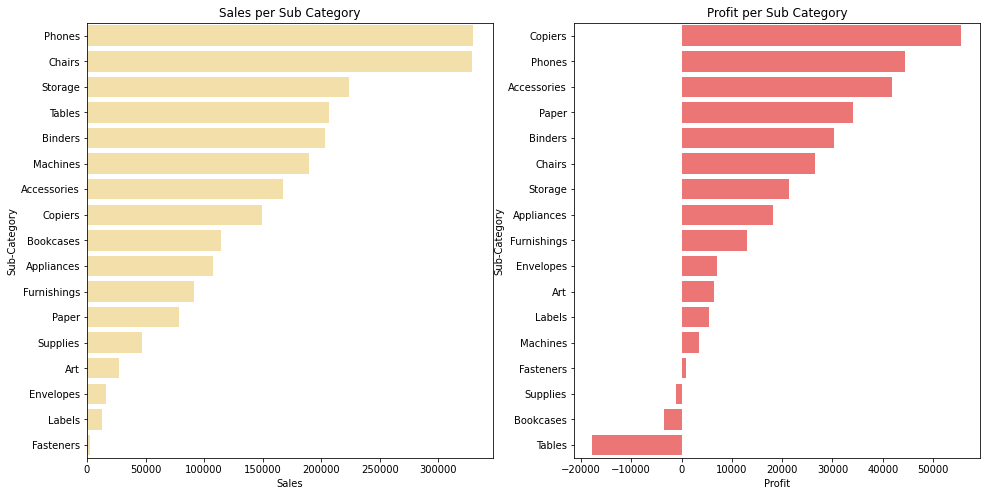

In [26]:
# Sales per Sub Category
sales_per_subcats = df[['Sub-Category','Sales', 'Quantity', 'Profit']].groupby(['Sub-Category'], as_index=False).sum(['Sales','Quantity','Profit']).sort_values(by='Sales',ascending=False)
# Profit per Sub Category
profit_per_subcats=sales_per_subcats.sort_values(by='Profit', ascending=False)

# Plot Sales and Porfit per Sub Category
fig, axis=plt.subplots(1,2,figsize=(16,8))
ax1=sns.barplot(x='Sales', y='Sub-Category', data=sales_per_subcats, color='#FFE59D',ax=axis[0]).set(title='Sales per Sub Category')
ax2=sns.barplot(x='Profit',y='Sub-Category', data=profit_per_subcats, color='#FF6363',ax=axis[1]).set(title='Profit per Sub Category')

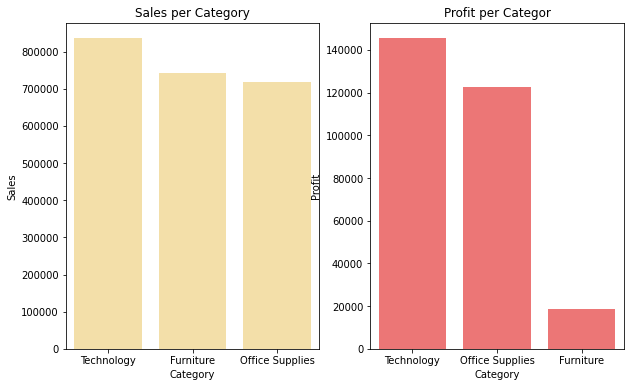

In [27]:
# Sales per Category
sales_per_cats = df[['Category','Sales', 'Quantity', 'Profit']].groupby(['Category'], as_index=False).sum(['Sales','Quantity','Profit']).sort_values(by='Sales',ascending=False)
# Profit per Sub Category
profit_per_cats=sales_per_cats.sort_values(by='Profit', ascending=False)

# Plot Sales and Porfit per Category
fig, axis=plt.subplots(1,2,figsize=(10,6))
ax1=sns.barplot(y='Sales', x='Category', data=sales_per_cats, color='#FFE59D',ax=axis[0]).set(title='Sales per Category')
ax2=sns.barplot(y='Profit',x='Category', data=profit_per_cats, color='#FF6363',ax=axis[1]).set(title='Profit per Categor')

Prduk kategori technology memiliki angka penjualan dan profit yang cukup tinggi. Sementara prduk pada kategori furniture meski penjualannnya tinggi namun profit yang dihasilkan terbilang rendah. Seperti diketahui berdasarkan grafik sales dan profit per sub category diketahui bahwa produk pada sub category tebles memiliki angka penjualan yang tinggi namun menghaslkan negative profit(rugi).

In [28]:
# Perbandingan profit antar regional 
profit_per_region=df[['Region','Profit']].groupby(['Region'],as_index=False).sum().sort_values(by='Profit',ascending=False)

# Menghitung Persentasi Profit per Region
profit_per_region['% profit']=profit_per_region['Profit']/[profit_per_region['Profit'].sum()]*100
profit_per_region['% profit']=profit_per_region['% profit'].round(2)
profit_per_region

,Region,Profit,% profit
3,West,108418.4489,37.86
1,East,91522.7800,31.96
2,South,46749.4303,16.32
0,Central,39706.3625,13.86


Text(0.5, 1.0, 'Perbandingan % Profit per Region')

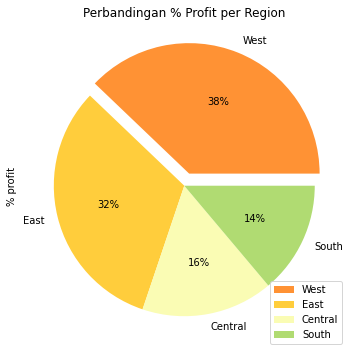

In [29]:
# Plot Komposisi Profit per Region
explode = [0.1, 0, 0, 0]
profit_per_region.plot.pie(y='% profit', figsize=(6,6), labels=['West','East','Central', 'South'], explode=explode, autopct='%.0f%%', colors=['#FF9234','#FFCD3C', '#FAFCB4', '#B0DB72'])
plt.legend(loc='lower right')
plt.title('Perbandingan % Profit per Region')

In [30]:
# Perbandingan Sales antar regional 
sales_per_region=df[['Region','Sales']].groupby(['Region'],as_index=False).sum().sort_values(by='Sales',ascending=False)

# Menghitung Persentasi Sales per Region
sales_per_region['% sales']=sales_per_region['Sales']/[sales_per_region['Sales'].sum()]*100
sales_per_region['% sales']=sales_per_region['% sales'].round(2)
sales_per_region

,Region,Sales,% sales
3,West,725457.8245,31.58
1,East,678781.2400,29.55
0,Central,501239.8908,21.82
2,South,391721.9050,17.05


Text(0.5, 1.0, 'Perbandingan % Sales per Region')

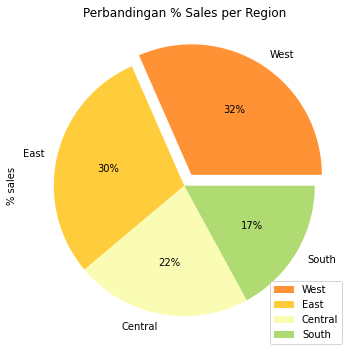

In [31]:
# Plot Komposisi Sales per Region
explode = [0.1, 0, 0, 0]
sales_per_region.plot.pie(y='% sales', figsize=(6,6), labels=['West','East','Central', 'South'], explode=explode, autopct='%.0f%%', colors=['#FF9234','#FFCD3C', '#FAFCB4', '#B0DB72'])
plt.legend(loc='lower right')
plt.title('Perbandingan % Sales per Region')

Persentase sales dan profit tertinggi didapatkan dari Region West. Sementara, di Region central meskipun nilai salesnya menempati urutan ketiga setelah Region West dan East, untuk persentase profit malah lebih unggul Region South yang menempati urutan terakhir dari segi penjualan/sales.


# **DATA PREPROCESSING**

### a. Missing values, duplicates data and outlier detection

In [32]:
# Check missing value
df.isna().sum()

Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code       0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Packaging Time    0
Year              0
Month             0
dtype: int64

(Tidak ditemukan missing value pada dataset)

In [33]:
# Cek duplicates data
duplicate = df[df.duplicated()]
duplicate

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Packaging Time,Year,Month
3406,US-2014-150119,2014-04-23 00:00:00+00:00,2014-04-27 00:00:00+00:00,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,...,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588,4 days,2014,4


In [34]:
# Drop duplicates data
df.drop_duplicates(inplace=True)
df.shape

(9993, 23)

In [35]:
# Find and remove outliers data using IQR
num_col_outlier = ['Sales','Discount','Profit','Quantity']
for col in num_col_outlier: 
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    df = df.loc[(df[col] > range_low) & (df[col] < range_high)]

df.shape

(6794, 23)

### b. Uji Normalitas dengan Shapiro Wilk

H0 : data berdistribusi normal<br>
H1 : data tidak berdistribusi normal

In [36]:
# Cek Normalitas dengan Uji Shapiro-Wilk
for i in num_cols:
  stat, p = shapiro(df[i])
  print('Statistics=%.3f, p=%.3f' % (stat, p))
  # Pengujian Hipotesis
  alpha = 0.05
  if p > alpha:
    print('Gagal Tolak H0, {} berdistribusi normal'.format(i))
  else:
    print('Tolak H0, {} tidak berdistribusi normal'.format(i))

Statistics=0.706, p=0.000
Tolak H0, Sales tidak berdistribusi normal
Statistics=0.891, p=0.000
Tolak H0, Quantity tidak berdistribusi normal
Statistics=0.691, p=0.000
Tolak H0, Discount tidak berdistribusi normal
Statistics=0.915, p=0.000
Tolak H0, Profit tidak berdistribusi normal


### c. Uji Linearitas

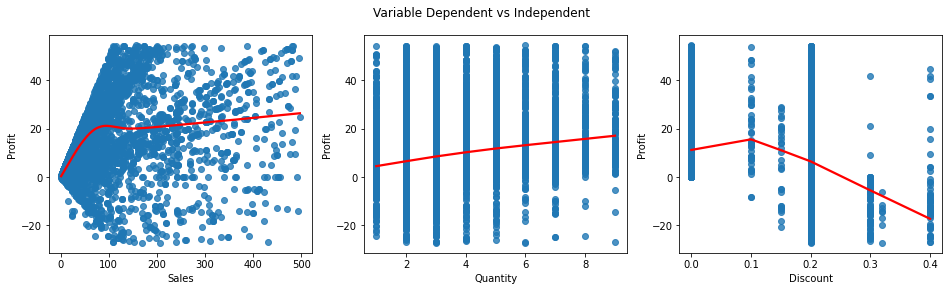

In [37]:
# Keterkaitan x dengan y
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
fig.suptitle('Variable Dependent vs Independent')

sns.regplot(x=df["Sales"], y=df["Profit"], lowess=True, line_kws={'color': 'red'}, ax=axes[0])
sns.regplot(x=df["Quantity"], y=df["Profit"], lowess=True, line_kws={'color': 'red'}, ax=axes[1])
sns.regplot(x=df["Discount"], y=df["Profit"], lowess=True, line_kws={'color': 'red'}, ax=axes[2])
plt.show()

### d. Uji Multikolinearitas

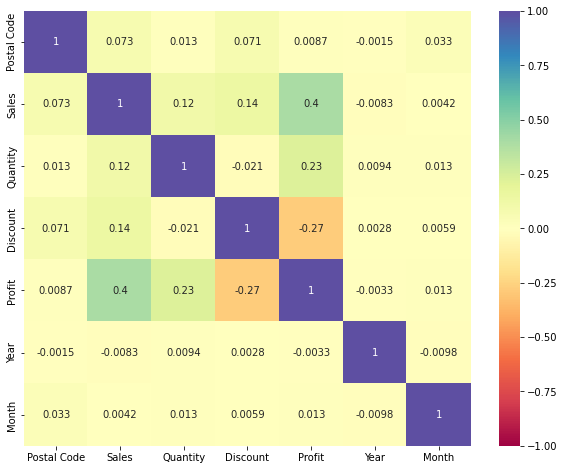

In [38]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), vmax=1, vmin=-1, center=0, cmap="Spectral", annot=True)

### **FEATURE ENGINEERING**

In [39]:
df_models=df.drop(columns =['Order ID', 'Customer ID', 'City', 'State', 'Product ID', 'Sub-Category', 'Country', 'Order Date','Postal Code', 'Year', 'Month', 'Packaging Time', 'Product Name', 'Ship Date', 'Customer Name'])
df_models.head()

,Ship Mode,Segment,Region,Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,South,Furniture,261.960,2,0.0,41.9136
2,Second Class,Corporate,West,Office Supplies,14.620,2,0.0,6.8714
4,Standard Class,Consumer,South,Office Supplies,22.368,2,0.2,2.5164
5,Standard Class,Consumer,West,Furniture,48.860,7,0.0,14.1694
6,Standard Class,Consumer,West,Office Supplies,7.280,4,0.0,1.9656


### a. Label Encoder

In [40]:
# Menentukan feature yang masih berbentuk data kategorikal
category_cols =["Ship Mode", "Segment", "Region", "Category"]
df_cat = df[category_cols]
df_cat.head()

,Ship Mode,Segment,Region,Category
0,Second Class,Consumer,South,Furniture
2,Second Class,Corporate,West,Office Supplies
4,Standard Class,Consumer,South,Office Supplies
5,Standard Class,Consumer,West,Furniture
6,Standard Class,Consumer,West,Office Supplies


In [41]:
# Dummy Variable untuk for categorycal data
shipment_mode = pd.get_dummies(df_models['Ship Mode'])
customers = pd.get_dummies(df_models['Segment'])
region = pd.get_dummies(df_models['Region'])
categories = pd.get_dummies(df_models['Category'])

# Let's drop the first column from status df using 'drop_first = True'
shipment_mode = pd.get_dummies(df_models['Ship Mode'], drop_first = True)
customers = pd.get_dummies(df_models['Segment'], drop_first = True)
region = pd.get_dummies(df_models['Region'], drop_first = True)
categories = pd.get_dummies(df_models['Category'], drop_first = True)

In [42]:
# Add the results to the original housing dataframe
df_models = pd.concat([df_models, shipment_mode, customers, region, categories], axis = 1)
df_models.drop(category_cols, axis=1, inplace=True)
df_models.head()

,Sales,Quantity,Discount,Profit,Same Day,Second Class,Standard Class,Corporate,Home Office,East,South,West,Office Supplies,Technology
0,261.960,2,0.0,41.9136,0,1,0,0,0,0,1,0,0,0
2,14.620,2,0.0,6.8714,0,1,0,1,0,0,0,1,1,0
4,22.368,2,0.2,2.5164,0,0,1,0,0,0,1,0,1,0
5,48.860,7,0.0,14.1694,0,0,1,0,0,0,0,1,0,0
6,7.280,4,0.0,1.9656,0,0,1,0,0,0,0,1,1,0


### b. Scaling

In [43]:
# Scaling Numerical Data
transformation_data = StandardScaler().fit(df_models[['Sales', 'Quantity', 'Discount', 'Profit']])
df_models[['Sales', 'Quantity', 'Discount', 'Profit']]=transformation_data.transform(
    df_models[['Sales', 'Quantity', 'Discount', 'Profit']])
 
df_models.head()

,Sales,Quantity,Discount,Profit,Same Day,Second Class,Standard Class,Corporate,Home Office,East,South,West,Office Supplies,Technology
0,2.236240,-0.738087,-0.916828,2.179231,0,1,0,0,0,0,1,0,0,0
2,-0.625625,-0.738087,-0.916828,-0.361237,0,1,0,1,0,0,0,1,1,0
4,-0.535977,-0.738087,0.993271,-0.676964,0,0,1,0,0,0,1,0,1,0
5,-0.229449,1.937774,-0.916828,0.167849,0,0,1,0,0,0,0,1,0,0
6,-0.710553,0.332257,-0.916828,-0.716895,0,0,1,0,0,0,0,1,1,0


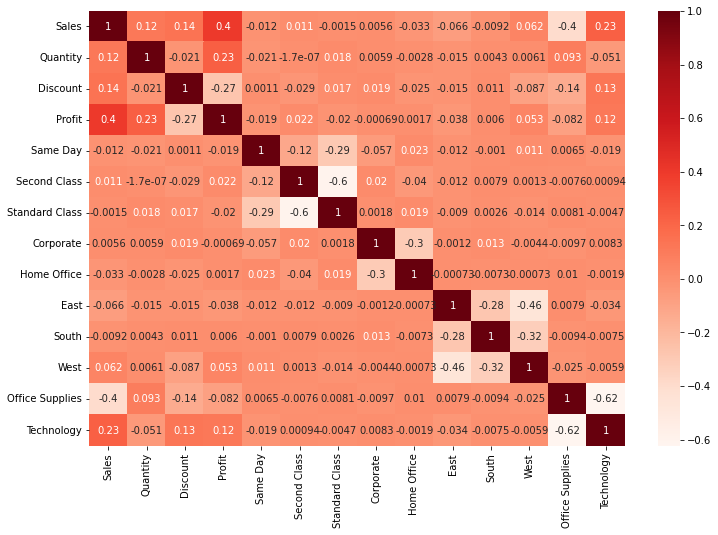

In [44]:
#Using Pearson Correlation
plt.figure(figsize=(12,8))
cor = df_models.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# **MODELING**

### a. Train Test Split

data train 70% 

data test 30%

In [55]:
X = df_models.drop("Profit", axis=1).values
y = df_models["Profit"].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [56]:
print("Ukuran X train ", len(X_train))
print("Ukuran X test ", len(X_test))
print("Ukuran y train ", len(y_train))
print("Ukuran y test ", len(y_test))

Ukuran X train  4755
Ukuran X test  2039
Ukuran y train  4755
Ukuran y test  2039


### b. Model dengan package Statsmodels

In [57]:
# Masukkan intercepts secara manual
Input = sm.add_constant(X_train)

In [58]:
# Modelling dengan statsmodels
SimpleModel = sm.OLS(y_train, Input, missing='drop')
results = SimpleModel.fit()

In [59]:
# Print results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     172.9
Date:                Tue, 20 Sep 2022   Prob (F-statistic):               0.00
Time:                        02:12:34   Log-Likelihood:                -5846.2
No. Observations:                4755   AIC:                         1.172e+04
Df Residuals:                    4741   BIC:                         1.181e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1799      0.051     -3.512      0.0

In [60]:
print('coefficient of determination:', results.rsquared)
print('adjusted coefficient of determination:', results.rsquared_adj)
print('regression coefficients:', results.params)

coefficient of determination: 0.32157200805467245
adjusted coefficient of determination: 0.31971173302930034
regression coefficients: [-0.17994483  0.44506758  0.16880536 -0.33917461 -0.08185544 -0.02997272
 -0.0873798   0.02039295  0.00257757  0.00254548  0.06878497  0.01733633
  0.24658017  0.36358443]


In [61]:
# membuat list
list_columns = []

for i in df_models.columns:
  if i != "Profit":
    list_columns.append(i)

In [62]:
# Membuat Prediksi Model
Input_test = sm.add_constant(X_test)
prediction_1 = results.predict(Input_test)

# Tampilkan dalam bentuk dataframe
df_statsmod = pd.DataFrame(X_test, columns=list_columns)
df_statsmod["actual_profit"] = y_test
df_statsmod["prediction_profit"] = prediction_1
df_statsmod.head()

,Sales,Quantity,Discount,Same Day,Second Class,Standard Class,Corporate,Home Office,East,South,West,Office Supplies,Technology,actual_profit,prediction_profit
0,1.530550,-0.202915,-0.916828,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,2.783055,1.131057
1,1.134258,-0.738087,-0.916828,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.162296,0.730433
2,2.363284,-0.202915,-0.916828,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.859396,1.310334
3,-0.433230,1.937774,0.993271,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.066506,-0.128210
4,-0.723513,-0.738087,-0.916828,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.645036,-0.313040


In [63]:
# R-square
print('R-square :', metrics.r2_score(df_statsmod['actual_profit'], df_statsmod['prediction_profit']))
# MSE
print('MSE :', metrics.mean_squared_error(df_statsmod['actual_profit'], df_statsmod['prediction_profit']))

R-square : 0.31561751571970553
MSE : 0.6692558559917351


### b. Linear Regression Scikit Learn

In [64]:
# Create linear regression object
regr = LinearRegression()

# Train model dengan training sets
regr.fit(X_train, y_train)

LinearRegression()

In [65]:
# Membuat prediksi dengan testing set
y_pred = regr.predict(X_test)

In [68]:
# Mean squared error
print("Mean squared error: %.4f" % mean_squared_error(y_test, y_pred))
# Root mean squared error
print("Root mean squared error: %.4f" % np.sqrt(mean_squared_error(y_test, y_pred)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.4f" % r2_score(y_test, y_pred))
# R2 data train
print('R2 for Train', regr.score( X_train, y_train ))
# R2 data test
print('R2 for Test', regr.score(X_test, y_test))

Mean squared error: 0.6693
Root mean squared error: 0.8181
Coefficient of determination: 0.3156
R2 for Train 0.32157200805467245
R2 for Test 0.31561751571970553


In [85]:
# Membuat KFold model
kfold = KFold(n_splits=10, shuffle=True, random_state=0)
# Pemodelan dengan Linear Regression
lm = LinearRegression()

# Train model dengan training sets
lm.fit(X_train,y_train)

LinearRegression()

In [86]:
# Train and evaluate multiple models using kfolds
results1 = cross_val_score(lm, X, y, cv=kfold, scoring='r2')
print(results1)
print("Mean:", results1.mean())
print("Std:", results1.std())

results2 = cross_val_score(lm, X, y, cv=kfold, scoring='neg_mean_squared_error')
print(results2)
print("RMSE:", results2.mean())
print("Std:", results2.std())


[0.28661692 0.29849914 0.36482708 0.32225331 0.34230782 0.33026548
 0.26083397 0.31921124 0.27491338 0.3700404 ]
Mean: 0.3169768743032746
Std: 0.03484389921203594
[-0.6800569  -0.75177276 -0.57562736 -0.67730326 -0.64869748 -0.59943349
 -0.7899957  -0.64599375 -0.75042653 -0.70875735]
RMSE: -0.6828064584892395
Std: 0.06518179255265956


###c. SVR

In [70]:
# Create linear regression object
svr = SVR(kernel = 'rbf')

# Train model dengan training sets
svr.fit(X_train, y_train)

SVR()

In [71]:
# Membuat prediksi dengan testing set
y_pred = svr.predict(X_test)

In [72]:
# Mean squared error
print("Mean squared error: %.4f" % mean_squared_error(y_test, y_pred))
# Root mean squared error
print("Root mean squared error: %.4f" % np.sqrt(mean_squared_error(y_test, y_pred)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.4f" % r2_score(y_test, y_pred))
# R2 data train
print('R2 for Train', svr.score( X_train, y_train ))
# R2 data test
print('R2 for Test', svr.score(X_test, y_test))

Mean squared error: 0.4073
Root mean squared error: 0.6382
Coefficient of determination: 0.5835
R2 for Train 0.6368420791037692
R2 for Test 0.5834892223144916
